<a href="https://colab.research.google.com/github/Bone-Age-Maisha/Bone_imp_1/blob/main/Bone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [2]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 124020 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [4]:
import numpy as np
import cv2
import os
import pandas as pd


In [5]:
import pandas as pd
train_dir = '/content/drive/MyDrive/RSNA/archive/boneage-training-dataset/boneage-training-dataset'
df = pd.read_csv('/content/drive/MyDrive/RSNA/archive/boneage-training-dataset.csv')

In [6]:
df['boneage'].max()

228

In [7]:
df['boneage'].min()

1

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [8]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

cnt=1
path = train_dir
k = 1
print ('Loading data set...')
k=1
for i in os.listdir(path):
  #print(i)
  #print(cnt)
  cnt=cnt+1
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  #print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(300,300))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)
  k=k+1
  print(k) 
print ('100% completed loading data')
print(k)


Streaming output truncated to the last 5000 lines.
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804

In [9]:

!pip install visualization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 7.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.5 MB/s 
     |████████████████████████████████| 669 kB 72.5 MB/s 
     |████████████████████████████████| 132 kB 93.5 MB/s 
     |████████████████████████████████| 109 kB 74.0 MB/s 
     |████████████████████████████████| 978 kB 83.1 MB/s 
     |████████████████████████████████| 2.2 MB 78.7 MB/s 
     |████████████████████████████████| 964 kB 79.5 MB/s 
     |████████████████████████████████| 555 kB 97.0 MB/s 
     |████████████████████████████████| 212 kB 94.1 MB/s 
     |████████████████████████████████| 1.0 MB 89.9 MB/s 
     |████████████████████████████████| 1.1 MB 90.9 MB/s 
     |████████████████████████████████| 40 kB 7.5 MB/s 
     |████████████████████████████████| 104 kB 101.9 MB/s 
     |████████████████████████████████| 107 kB 103.1 MB/s 
  Created wheel for PyOpenGL: fi

In [10]:
import numpy as np
import cv2
from keras import backend as K
from keras.preprocessing import image
import os

def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel


def ShowAttentionV1(model,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        print (filename)
        filepath=image_path+filename
        image=load_image(filepath)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        layer=K.function([model.layers[0].input],[model.layers[196].output])
        FeatureMap=layer([image,gender])[0]
        print (FeatureMap.shape)
        FeatureMap = np.squeeze(FeatureMap, axis=0)
        FeatureMap = np.abs(FeatureMap)
        heatmap = np.mean(FeatureMap,axis=2)
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')

def GAPAttention(model,weights,image_path):
    file_list = os.listdir(train_dir)
    file_list.sort()
    for filename in file_list:
        filepath=image_path+filename
        print (filepath)
        image=load_image(filepath)
        print("gpa")
        print(image.shape)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        print("ok")
        layer=K.function([model.layers[0].input],[model.layers[1].get_output_at(-1),model.layers[-1].output])
        print("ok_1")
        GAP,prediction=layer([image])
        print("ok_2")
        GAP=np.squeeze(GAP,axis=0)
        print("ok_3")
        print (GAP.shape)
        print("ok_4")
        index = np.argmax(prediction)
        print("ok_5")
        print (index)
       # weight = weights[:,index]
        weight =np.mean(weights[:,index-5:index+5],axis=1)
        heatmap = np.zeros((GAP.shape[0],GAP.shape[1]))
        for k in range(GAP.shape[2]):
            heatmap = heatmap + weight[k]*GAP[:,:,k]
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')

def SaveImg(filename,filepath,heatmap):
    img = cv2.imread(filepath)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    AttentionImg =0.5* heatmap + img
    cv2.imwrite('/content/heat'+filename,heatmap)
    cv2.imwrite('/content/attention'+filename,AttentionImg)


def load_image(path):
    img = cv2.imread(path)
    print(img.shape)
    img = cv2.resize(img,(300,300))
    print(img.shape)
    x = np.asarray(img, dtype=np.float32)
   # img = image.load_img(path, target_size=(448, 448))
   # print (img.shape)
   # x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

def TestMAE(model,test_data,test_label,test_gender):
    test_gender = np.array(test_gender)
    test_gender = np.expand_dims(test_gender,axis=1)
    layer=K.function([model.layers[0].input,model.layers[3].input],[model.layers[-1].output])
    predictions=layer([test_data,test_gender])
    predictions = np.array(predictions)
    predictions = np.squeeze(predictions,axis=0)
    print (predictions.shape)
    predict_label = np.argmax(predictions,axis=1)
    test_label = np.argmax(test_label,axis=1)
    print (predict_label)
    print (test_label)
    TestMAE = np.mean(np.abs(predict_label-test_label))
    return TestMAE
    
def DataAugment(x_train):
    x_train_Aug = np.zeros(x_train.shape)
    for i in range(x_train.shape[0]):
        for j in range(3):
            img = x_train[i,:,:,j]
            img = RandomMask(img)
            img = RandomMask(img)
            if np.random.random()>-1:
                x_train_Aug[i,:,:,j]=img 
            else:
                x_train_Aug[i,:,:,j]=x_train[i,:,:,j]
    return x_train_Aug


def RandomMask(img):
    m,n=img.shape
    m=int(m/6)
    n=int(n/6)
    i,j = np.random.randint(0,6,2)
    img[i*m:(i+1)*m,j*n:(j+1)*n]=np.random.random()
    return img

In [11]:
y = np.asarray(y_age)
gender = np.asarray(y_gender)
x=np.asarray(X_train, dtype=np.float32)
x=x/255
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(42)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
#print (y_final[:50])
#print (gender_final[:50])
k = 1000 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
#y_train = softlabel(y_train,240)
#y_valid = softlabel(y_valid,240)
#y_test = softlabel(y_test,240)
#print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))


x_train shape:(10611, 300, 300, 3)
y_train shape:(10611,)
gender_train shape:(10611,)
x_valid shape:(1000, 300, 300, 3)
y_valid shape:(1000,)
gender_valid shape:(1000,)
x_test shape:(1000, 300, 300, 3)
y_test shape:(1000,)


In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 32
epochs = 30
     

In [13]:
def channel_attention(input_feature):
  kernel_initializer = tf.keras.initializers.variance_scaling()
  bias_initializer = tf.constant_initializer(value=0.0)
  channel = input_feature.get_shape()[-1]
  ratio=8
  avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
  assert avg_pool.get_shape()[1:] == (1,1,channel)
  avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
  assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
  avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer)  (avg_pool)  
  assert avg_pool.get_shape()[1:] == (1,1,channel)

  max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
  assert max_pool.get_shape()[1:] == (1,1,channel)
  max_pool = Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu) (max_pool)  
  assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
  max_pool = Dense(
                                 units=channel)  (max_pool)
  assert max_pool.get_shape()[1:] == (1,1,channel)

  scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
  return input_feature * scale


In [14]:
def spatial_attention(input_feature):
  kernel_size = 7
  kernel_initializer = tf.keras.initializers.variance_scaling()

  avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
  assert avg_pool.get_shape()[-1] == 1
  max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
  assert max_pool.get_shape()[-1] == 1
  concat = tf.concat([avg_pool,max_pool], 3)
  assert concat.get_shape()[-1] == 2

  concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  assert concat.get_shape()[-1] == 1
  concat = tf.keras.activations.sigmoid(concat)
    
  return input_feature * concat

In [15]:
import tensorflow as tf

base_model = InceptionV3(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
x=Flatten()(x)
f= keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
prediction = Dense(1)(f)

model = Model(inputs=[input,input_gender], outputs=prediction)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_invcam.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([x_train,gender_train],y_train,batch_size=4,epochs=30,verbose=1,validation_data=([x_valid,gender_valid],y_valid),callbacks = [checkpoint])
score = model.evaluate([x_test,gender_test], y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

87910968/87910968 [==============================] - 0s 0us/step
(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 8, 8, 2048)
(None, 2, 2, 2048)
(None, 8208)
0 input1
1 inception_v3
2 tf.math.reduce_mean
3 tf.math.reduce_max
4 dense_1
5 dense_3
6 dense_2
7 dense_4
8 tf.__operators__.add
9 tf.math.sigmoid
10 tf.math.multiply
11 tf.math.reduce_mean_1
12 tf.math.reduce_max_1
13 tf.concat
14 conv2d_94
15 tf.math.sigmoid_1
16 tf.math.multiply_1
17 max_pooling2d_4
18 input2
19 flatten
20 dense
21 concatenate_2
22 dense_5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
2653/2653 [==============================] - 186s 61ms/step - loss: 17.0298 - MAE: 17.0298 - val_loss: 14.4763 - val_MAE: 14.4763
Epoch 2/30
2653/2653 [==============================] - 156s 59ms/step - loss: 10.8618 - MAE: 10.8618 - val_loss: 11.3473 - val_MAE: 11.3473
Epoch 3/30
2653/2653 [==============================] - 149s 56ms/step - loss: 9.8496 - MAE: 9.8496 - val_loss: 10.1557 - val_MAE: 10.1557
Epoch 4/30
2653/2653 [==============================] - 168s 63ms/step - loss: 9.0746 - MAE: 9.0746 - val_loss: 9.6703 - val_MAE: 9.6703
Epoch 5/30
2653/2653 [==============================] - 167s 63ms/step - loss: 8.5687 - MAE: 8.5687 - val_loss: 10.3215 - val_MAE: 10.3215
Epoch 6/30
2653/2653 [==============================] - 138s 52ms/step - loss: 8.0679 - MAE: 8.0679 - val_loss: 9.2378 - val_MAE: 9.2378
Epoch 7/30
2653/2653 [==============================] - 133s 50ms/step - loss: 7.7930 - MAE: 7.7930 - val_loss: 11.0806 - val_MAE: 11.0806
Epoch 8/30
2653/2653 [=====

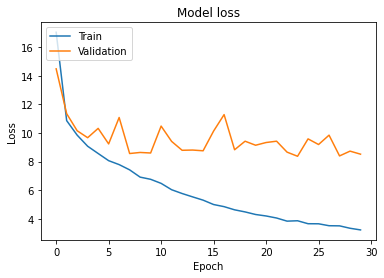

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
x=Flatten()(x)
f= keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
prediction = Dense(1)(f)

model = Model(inputs=[input,input_gender], outputs=prediction)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_invrescam.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([x_train,gender_train],y_train,batch_size=4,epochs=30,verbose=1,validation_data=([x_valid,gender_valid],y_valid),callbacks = [checkpoint])
score = model.evaluate([x_test,gender_test], y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

219055592/219055592 [==============================] - 1s 0us/step
(None, 8, 8, 1536)
(None, 8, 8, 1536)
(None, 8, 8, 1536)
(None, 2, 2, 1536)
(None, 6160)
0 input1
1 inception_resnet_v2
2 tf.math.reduce_mean_2
3 tf.math.reduce_max_2
4 dense_7
5 dense_9
6 dense_8
7 dense_10
8 tf.__operators__.add_1
9 tf.math.sigmoid_2
10 tf.math.multiply_2
11 tf.math.reduce_mean_3
12 tf.math.reduce_max_3
13 tf.concat_1
14 conv2d_298
15 tf.math.sigmoid_3
16 tf.math.multiply_3
17 max_pooling2d_9
18 input2
19 flatten_1
20 dense_6
21 concatenate_3
22 dense_11
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                          

Epoch 1/30
2653/2653 [==============================] - 319s 113ms/step - loss: 18.3136 - MAE: 18.3136 - val_loss: 11.4489 - val_MAE: 11.4489
Epoch 2/30
2653/2653 [==============================] - 312s 118ms/step - loss: 10.8927 - MAE: 10.8927 - val_loss: 10.3413 - val_MAE: 10.3413
Epoch 3/30
2653/2653 [==============================] - 323s 122ms/step - loss: 9.5198 - MAE: 9.5198 - val_loss: 9.4143 - val_MAE: 9.4143
Epoch 4/30
2653/2653 [==============================] - 324s 122ms/step - loss: 8.7712 - MAE: 8.7712 - val_loss: 8.7223 - val_MAE: 8.7223
Epoch 5/30
2653/2653 [==============================] - 323s 122ms/step - loss: 8.2365 - MAE: 8.2365 - val_loss: 9.5844 - val_MAE: 9.5844
Epoch 6/30
2653/2653 [==============================] - 326s 123ms/step - loss: 7.6740 - MAE: 7.6740 - val_loss: 9.0043 - val_MAE: 9.0043
Epoch 7/30
2653/2653 [==============================] - 323s 122ms/step - loss: 7.1479 - MAE: 7.1479 - val_loss: 10.4282 - val_MAE: 10.4282
Epoch 8/30
2653/2653 [==

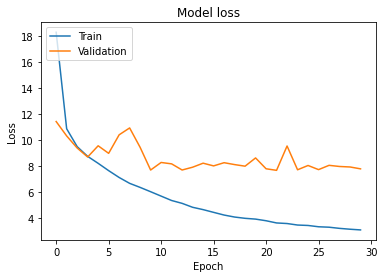

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet201

base_model = DenseNet201(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
x=Flatten()(x)
f= keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
prediction = Dense(1)(f)

model = Model(inputs=[input,input_gender], outputs=prediction)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_dens.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([x_train,gender_train],y_train,batch_size=4,epochs=30,verbose=1,validation_data=([x_valid,gender_valid],y_valid),callbacks = [checkpoint])
score = model.evaluate([x_test,gender_test], y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

74836368/74836368 [==============================] - 1s 0us/step
(None, 9, 9, 1920)
(None, 9, 9, 1920)
(None, 9, 9, 1920)
(None, 2, 2, 1920)
(None, 7696)
0 input1
1 densenet201
2 tf.math.reduce_mean_4
3 tf.math.reduce_max_4
4 dense_13
5 dense_15
6 dense_14
7 dense_16
8 tf.__operators__.add_2
9 tf.math.sigmoid_4
10 tf.math.multiply_4
11 tf.math.reduce_mean_5
12 tf.math.reduce_max_5
13 tf.concat_2
14 conv2d_299
15 tf.math.sigmoid_5
16 tf.math.multiply_5
17 max_pooling2d_10
18 input2
19 flatten_2
20 dense_12
21 concatenate_4
22 dense_17
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                               

Epoch 1/30
2653/2653 [==============================] - 281s 98ms/step - loss: 16.4103 - MAE: 16.4103 - val_loss: 11.2797 - val_MAE: 11.2797
Epoch 2/30
2653/2653 [==============================] - 255s 96ms/step - loss: 10.5520 - MAE: 10.5520 - val_loss: 11.4138 - val_MAE: 11.4138
Epoch 3/30
2653/2653 [==============================] - 255s 96ms/step - loss: 9.7009 - MAE: 9.7009 - val_loss: 8.6321 - val_MAE: 8.6321
Epoch 4/30
2653/2653 [==============================] - 262s 99ms/step - loss: 8.9464 - MAE: 8.9464 - val_loss: 9.3175 - val_MAE: 9.3175
Epoch 5/30
2653/2653 [==============================] - 271s 102ms/step - loss: 8.6412 - MAE: 8.6412 - val_loss: 9.0556 - val_MAE: 9.0556
Epoch 6/30
2653/2653 [==============================] - 293s 111ms/step - loss: 8.1861 - MAE: 8.1861 - val_loss: 9.6080 - val_MAE: 9.6080
Epoch 7/30
2653/2653 [==============================] - 293s 111ms/step - loss: 7.9877 - MAE: 7.9877 - val_loss: 9.6872 - val_MAE: 9.6872
Epoch 8/30
2653/2653 [========

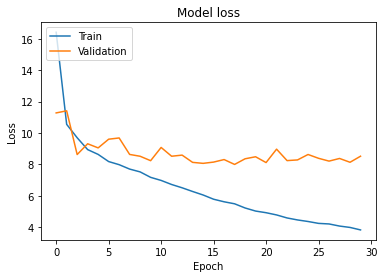

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet101

base_model = ResNet101(weights='imagenet', include_top=False)
input = Input(shape=(300,300,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
print (K.int_shape(output))
x=channel_attention(output)
print (K.int_shape(x))
x=spatial_attention(x)
print (K.int_shape(x))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(x)
print (K.int_shape(x))
x=Flatten()(x)
f= keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
prediction = Dense(1)(f)

model = Model(inputs=[input,input_gender], outputs=prediction)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=tf.keras.optimizers.Adam(lr=0.0003,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()

checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights_rescam.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=30)
#model.fit_generator(DataGen.flow([x_train,gender_train],y_train,batch_size=batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=50,verbose=1,validation_data=([x_valid,gender_valid,agev],y_valid))
history=model.fit([x_train,gender_train],y_train,batch_size=4,epochs=30,verbose=1,validation_data=([x_valid,gender_valid],y_valid),callbacks = [checkpoint])
score = model.evaluate([x_test,gender_test], y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

171446536/171446536 [==============================] - 1s 0us/step
(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 10, 10, 2048)
(None, 2, 2, 2048)
(None, 8208)
0 input1
1 resnet101
2 tf.math.reduce_mean_6
3 tf.math.reduce_max_6
4 dense_19
5 dense_21
6 dense_20
7 dense_22
8 tf.__operators__.add_3
9 tf.math.sigmoid_6
10 tf.math.multiply_6
11 tf.math.reduce_mean_7
12 tf.math.reduce_max_7
13 tf.concat_3
14 conv2d_300
15 tf.math.sigmoid_7
16 tf.math.multiply_7
17 max_pooling2d_11
18 input2
19 flatten_3
20 dense_18
21 concatenate_5
22 dense_23
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                         

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
2653/2653 [==============================] - 181s 64ms/step - loss: 20.1228 - MAE: 20.1228 - val_loss: 19.0702 - val_MAE: 19.0702
Epoch 2/30
2653/2653 [==============================] - 172s 65ms/step - loss: 12.8773 - MAE: 12.8773 - val_loss: 14.4076 - val_MAE: 14.4076
Epoch 3/30
2653/2653 [==============================] - 173s 65ms/step - loss: 11.1915 - MAE: 11.1915 - val_loss: 13.4990 - val_MAE: 13.4990
Epoch 4/30
2653/2653 [==============================] - 175s 66ms/step - loss: 10.4862 - MAE: 10.4862 - val_loss: 11.2425 - val_MAE: 11.2425
Epoch 5/30
2653/2653 [==============================] - 172s 65ms/step - loss: 9.8267 - MAE: 9.8267 - val_loss: 12.1147 - val_MAE: 12.1147
Epoch 6/30
2653/2653 [==============================] - 174s 65ms/step - loss: 9.1962 - MAE: 9.1962 - val_loss: 10.6220 - val_MAE: 10.6220
Epoch 7/30
2653/2653 [==============================] - 173s 65ms/step - loss: 8.8477 - MAE: 8.8477 - val_loss: 11.5578 - val_MAE: 11.5578
Epoch 8/30
2653/265

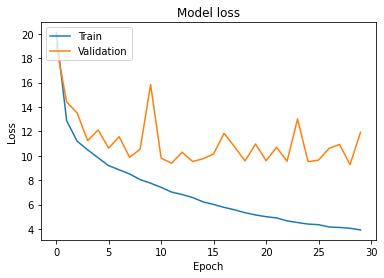

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()